In [1]:
import sys
sys.path.append('../scripts')

import requests
import pandas as pd
import numpy as np
from datetime import datetime
import time
import json

# from data_collector import LMDIDataCollector
from lmdi_analysis import LMDIPeakAnalyzer

In [2]:
# TODO
# do we need to add cement carbonation (i.e. take global co2 emissions from GCB google sheet)
# why does India not have any signal from carbon intensity? Because carbon intensity has been very slightly increasing, i.e. energy demand is growing faster than RE

Starting Complete LMDI Peak Detection Analysis
Loading GDP data from World Bank...
GDP data shape: (200, 3)
GDP columns: ['Entity', 'Year', 'GDP_PPP_2021']
Countries: ['Brazil', 'China', 'European Union (27)', 'India', 'Indonesia', 'Mexico', 'United States', 'World']
  Brazil: 25 years (2000-2024)
  China: 25 years (2000-2024)
  European Union (27): 25 years (2000-2024)
  Indonesia: 25 years (2000-2024)
  India: 25 years (2000-2024)
  Mexico: 25 years (2000-2024)
  United States: 25 years (2000-2024)
  World: 25 years (2000-2024)
Loading data from Our World in Data...
Loading co2 data...
  co2: 29137 rows, 4 columns
  Columns: ['Entity', 'Code', 'Year', 'emissions_total']
  Coverage: 8/8 target entities, years 1750-2023
  Total entities in dataset: 247
Loading primary_energy data...
  primary_energy: 13255 rows, 4 columns
  Columns: ['Entity', 'Code', 'Year', 'primary_energy_consumption__twh']
  Coverage: 8/8 target entities, years 1965-2024
  Total entities in dataset: 277
Successfull

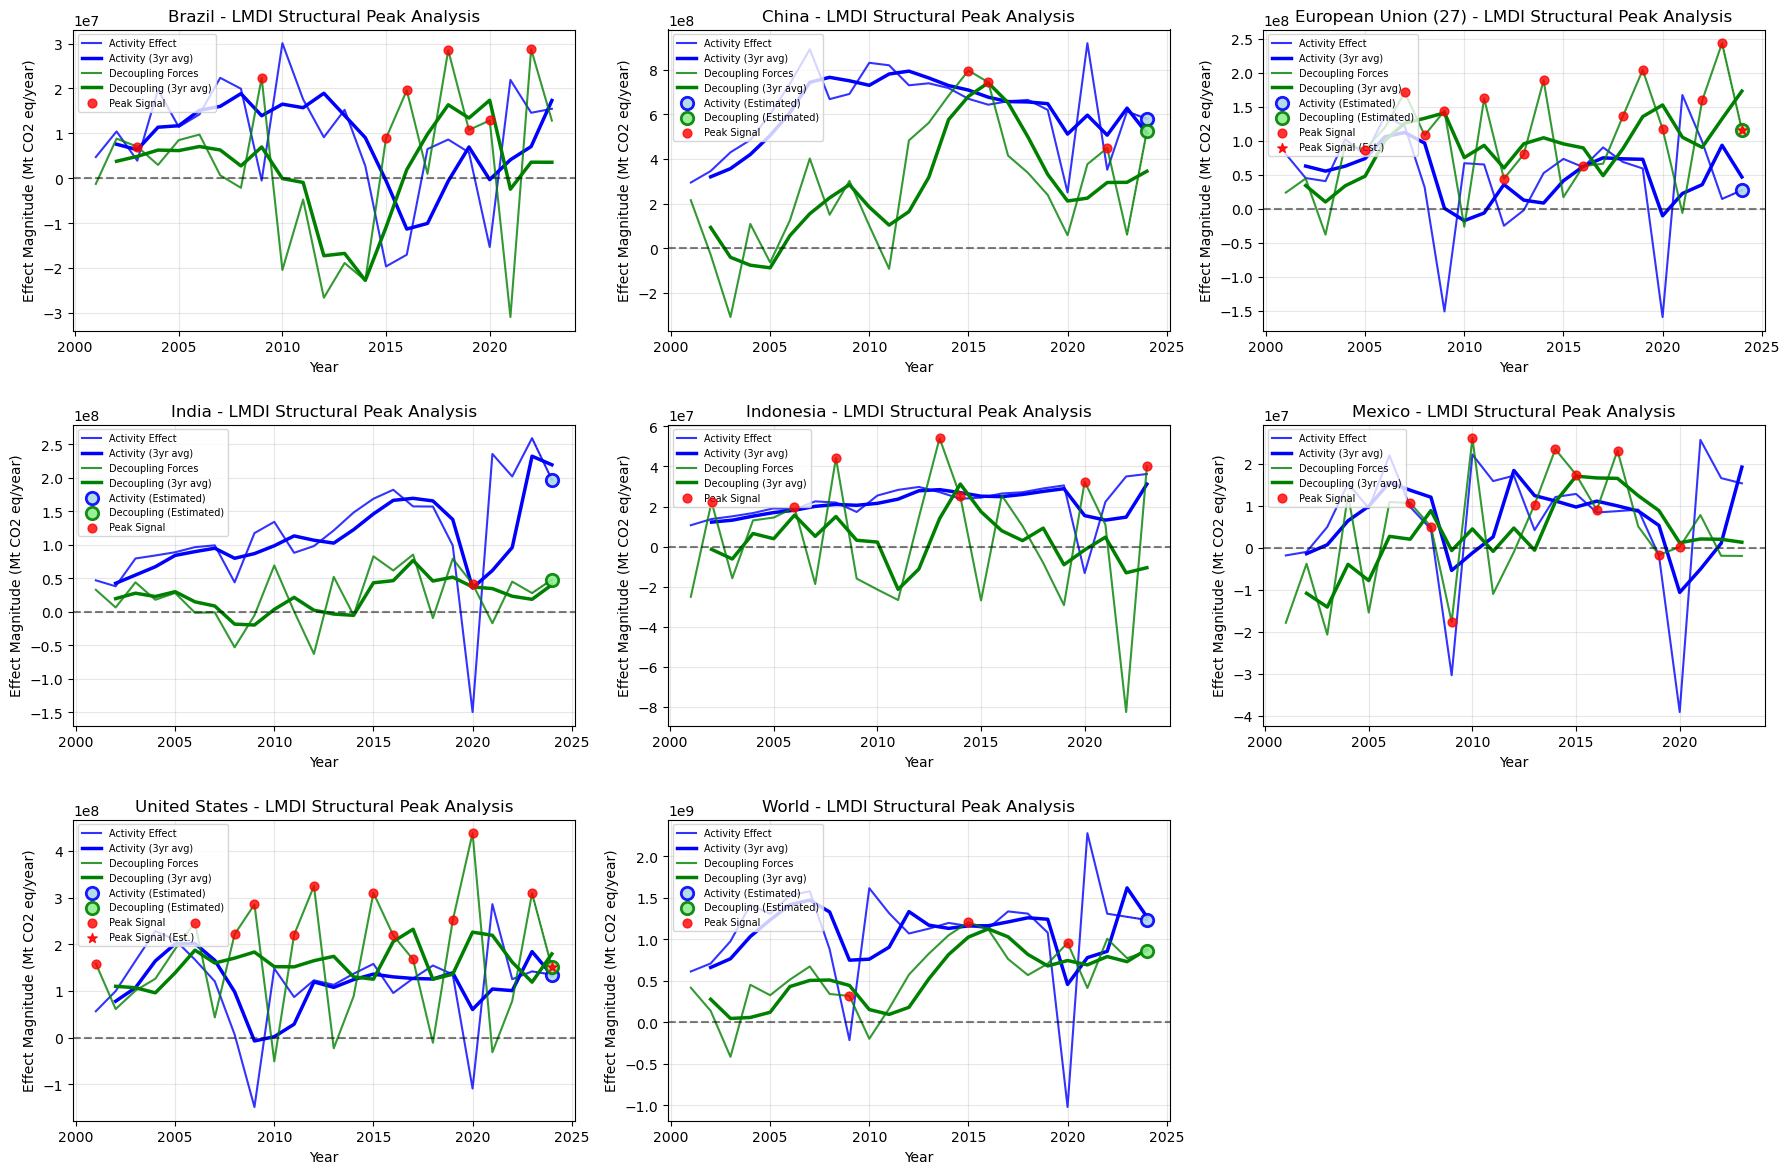

Top 15 countries by recent emission changes: ['World', 'India', 'European Union (27)', 'China', 'United States', 'Brazil', 'Indonesia', 'Mexico']
Entities with LMDI data: ['Brazil', 'China', 'European Union (27)', 'India', 'Indonesia', 'Mexico', 'United States', 'World']
Driver analysis includes 8 entities


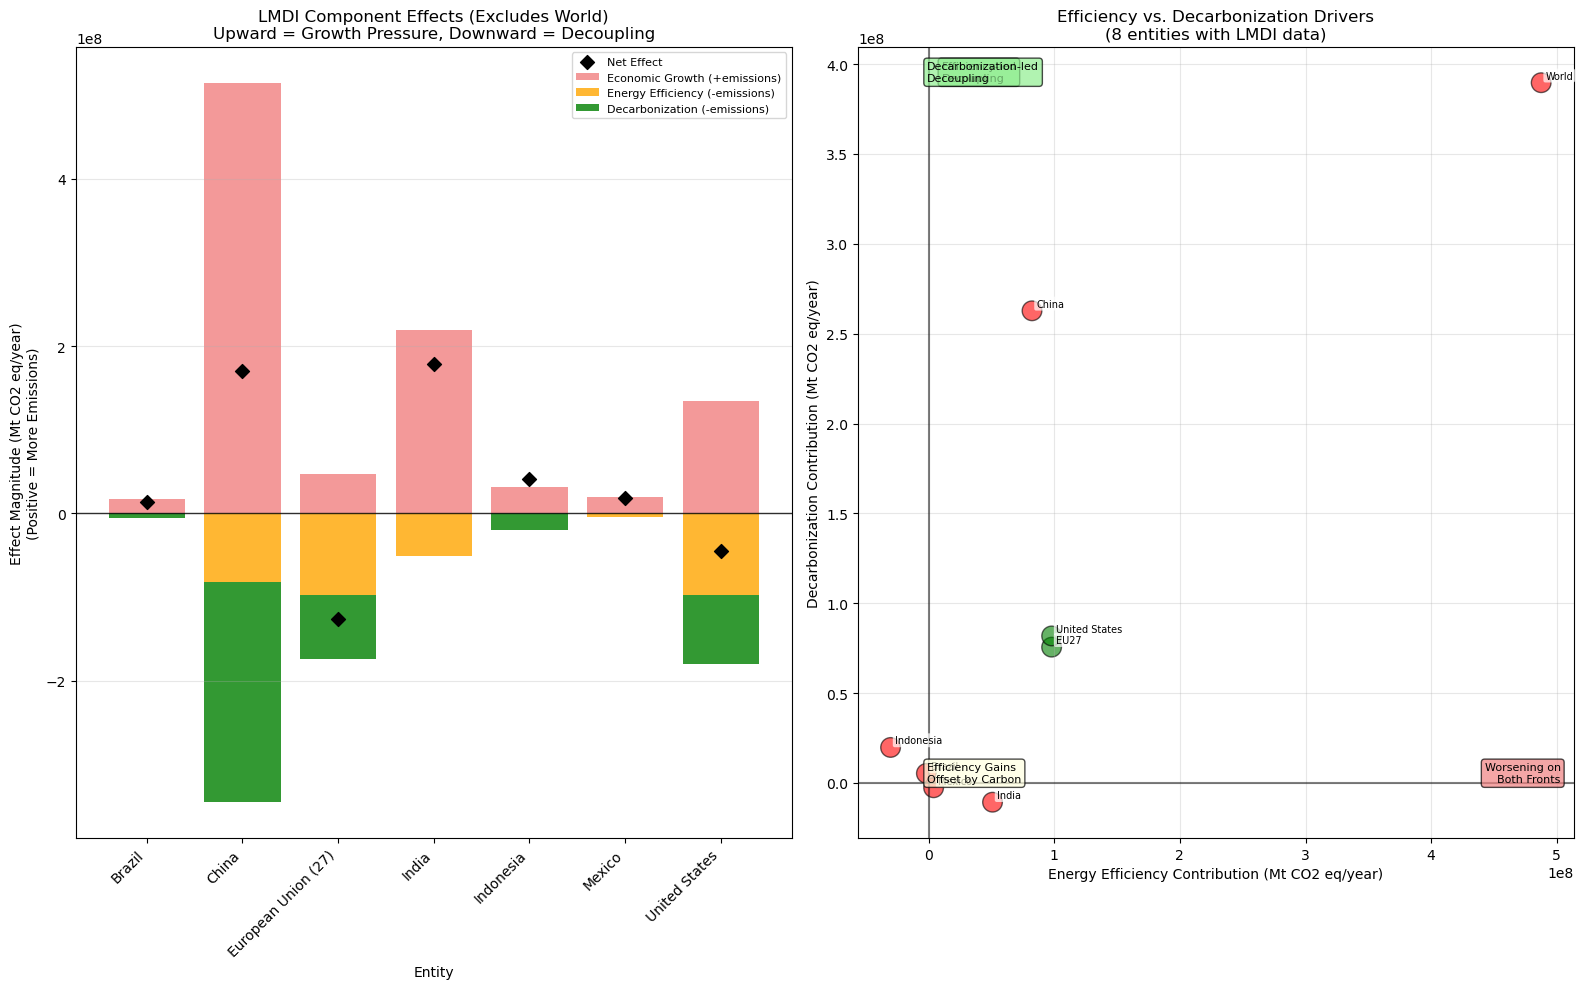


Key Findings:
  No Clear Signal: 5 entities
  Strong Peak Signal (Both): 1 entities
  Fading Peak Signal: 1 entities
  Moderate Peak Signal: 1 entities

Driver Analysis (Recent 3-year averages):
  Efficiency-driven decoupling:
    India: 50902486.0 efficiency vs -10718964.0 decarbonization
    Mexico: 4015439.4 efficiency vs -2678394.6 decarbonization
  Decarbonization-driven decoupling:
    Brazil: 5307788.6 decarbonization vs -1732804.1 efficiency
    China: 262732798.9 decarbonization vs 82323683.5 efficiency
    Indonesia: 19747435.6 decarbonization vs -30239971.7 efficiency
  Balanced approaches:
    European Union (27): 97926794.0 efficiency + 75556080.8 decarbonization
    United States: 97938778.0 efficiency + 81804546.4 decarbonization
    World: 487534936.4 efficiency + 389658248.8 decarbonization

Entities with active raw peak signals:
  European Union (27): Raw strength = 4.24
  United States: Raw strength = 1.11

Entities with active smoothed peak signals:
  European Unio

In [2]:
analyzer = LMDIPeakAnalyzer()
report = analyzer.run_complete_analysis()


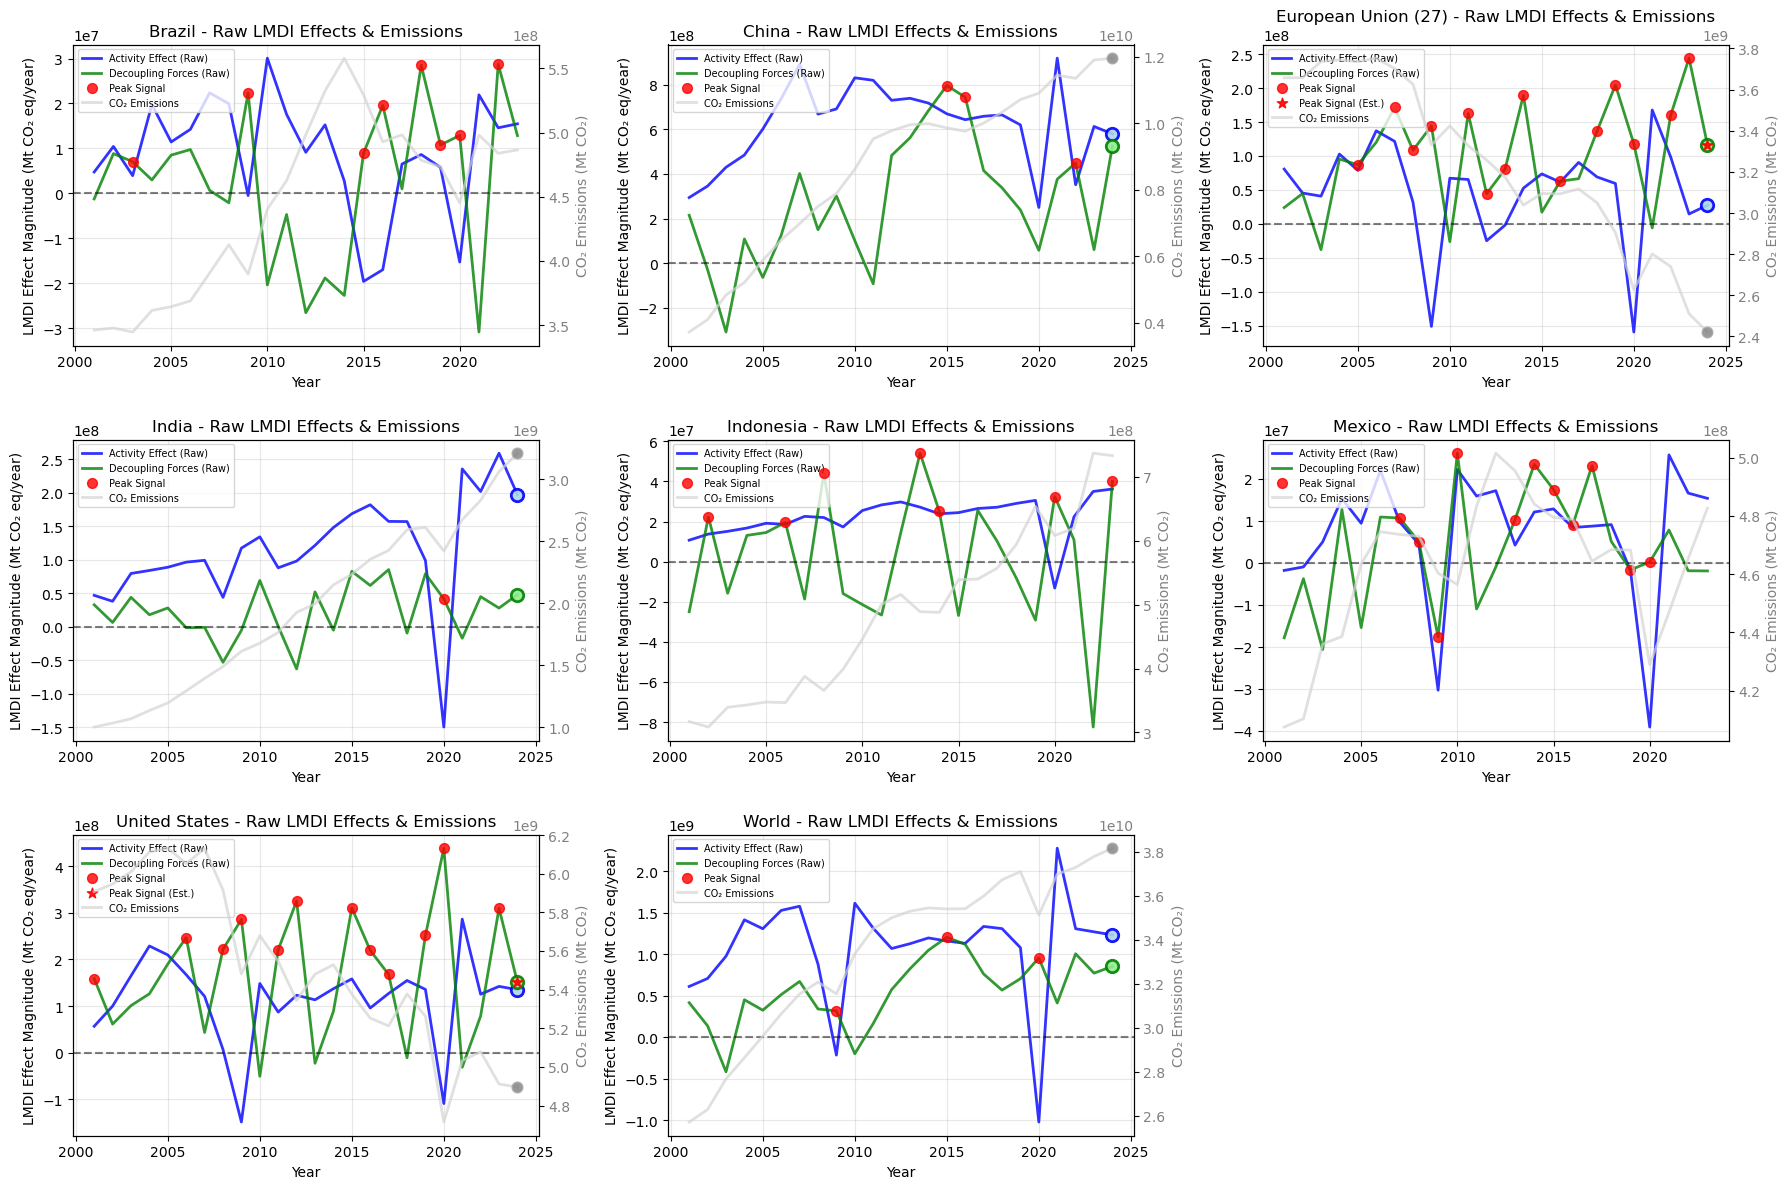

In [3]:
fig3 = analyzer.plot_raw_lmdi_with_emissions()

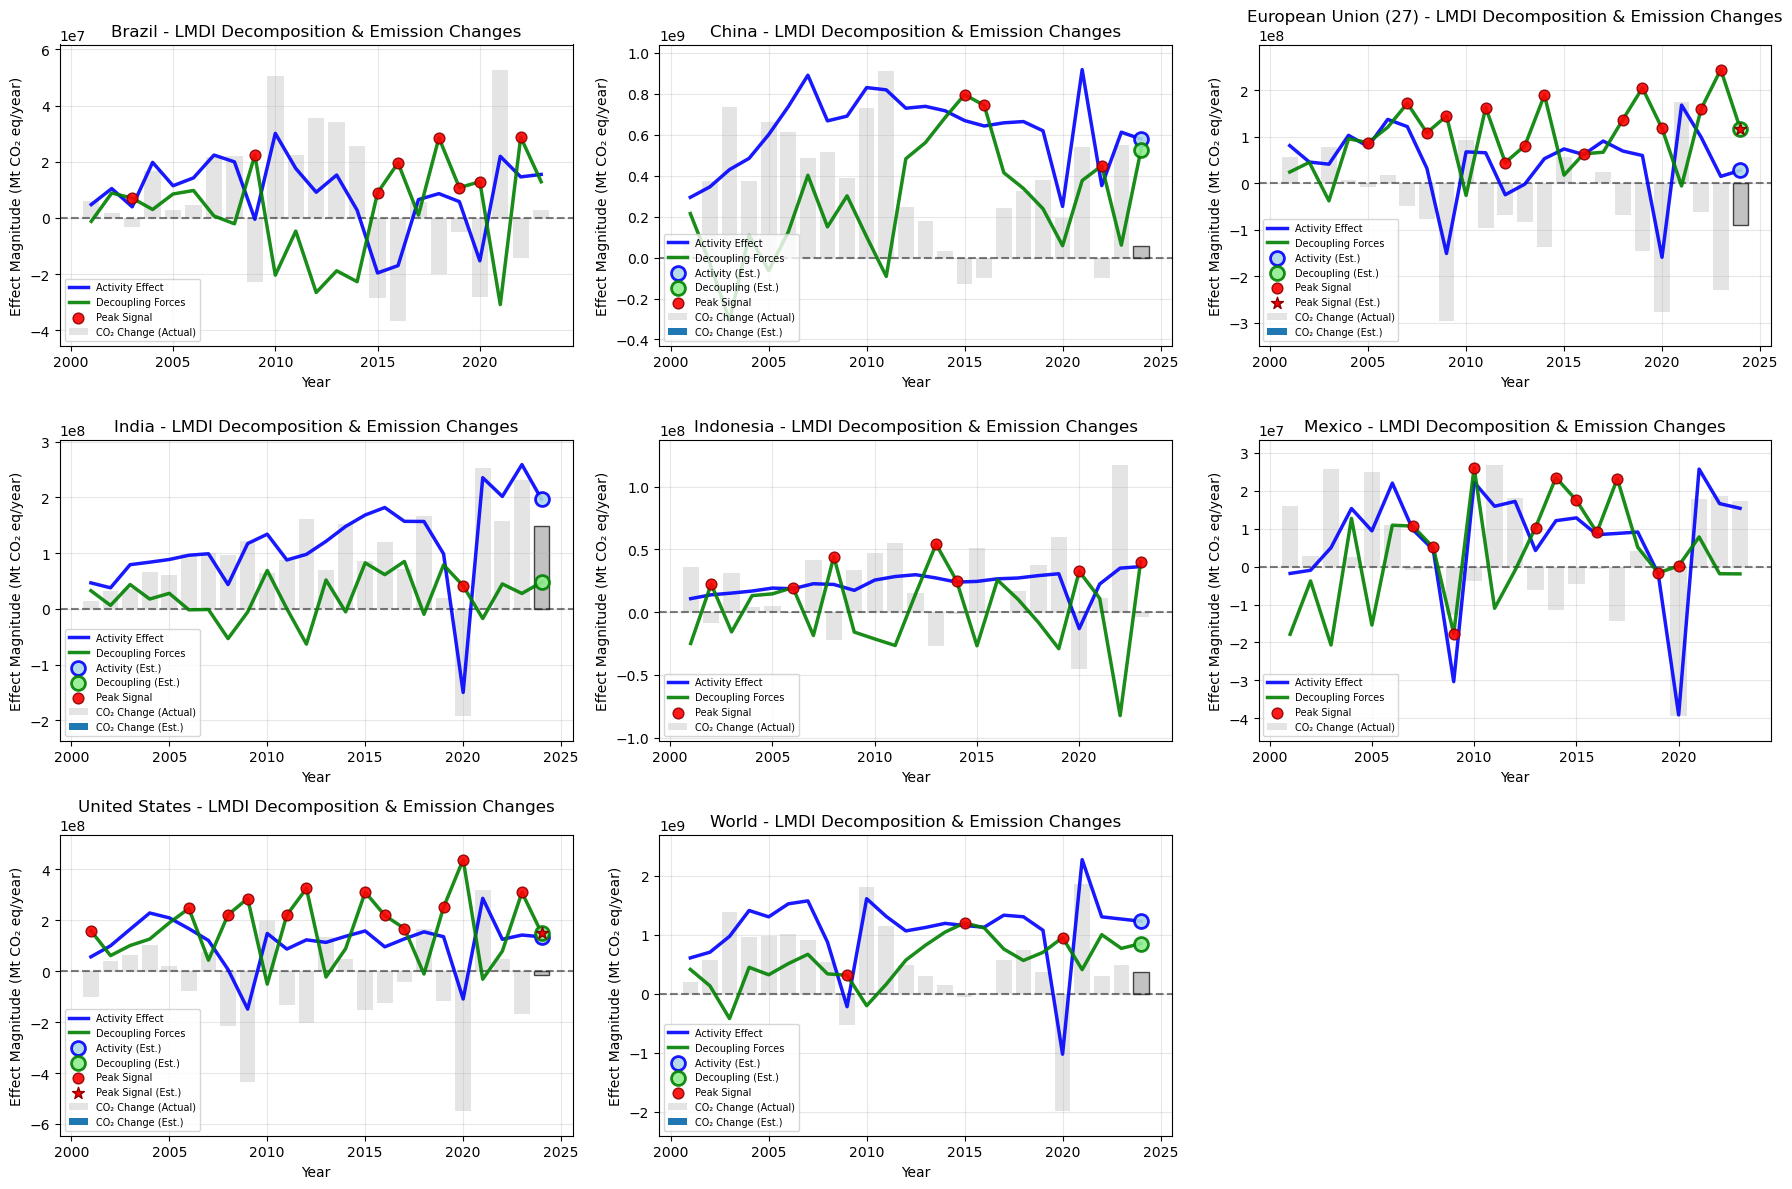

In [5]:
fig4 = analyzer.plot_lmdi_with_emission_changes()

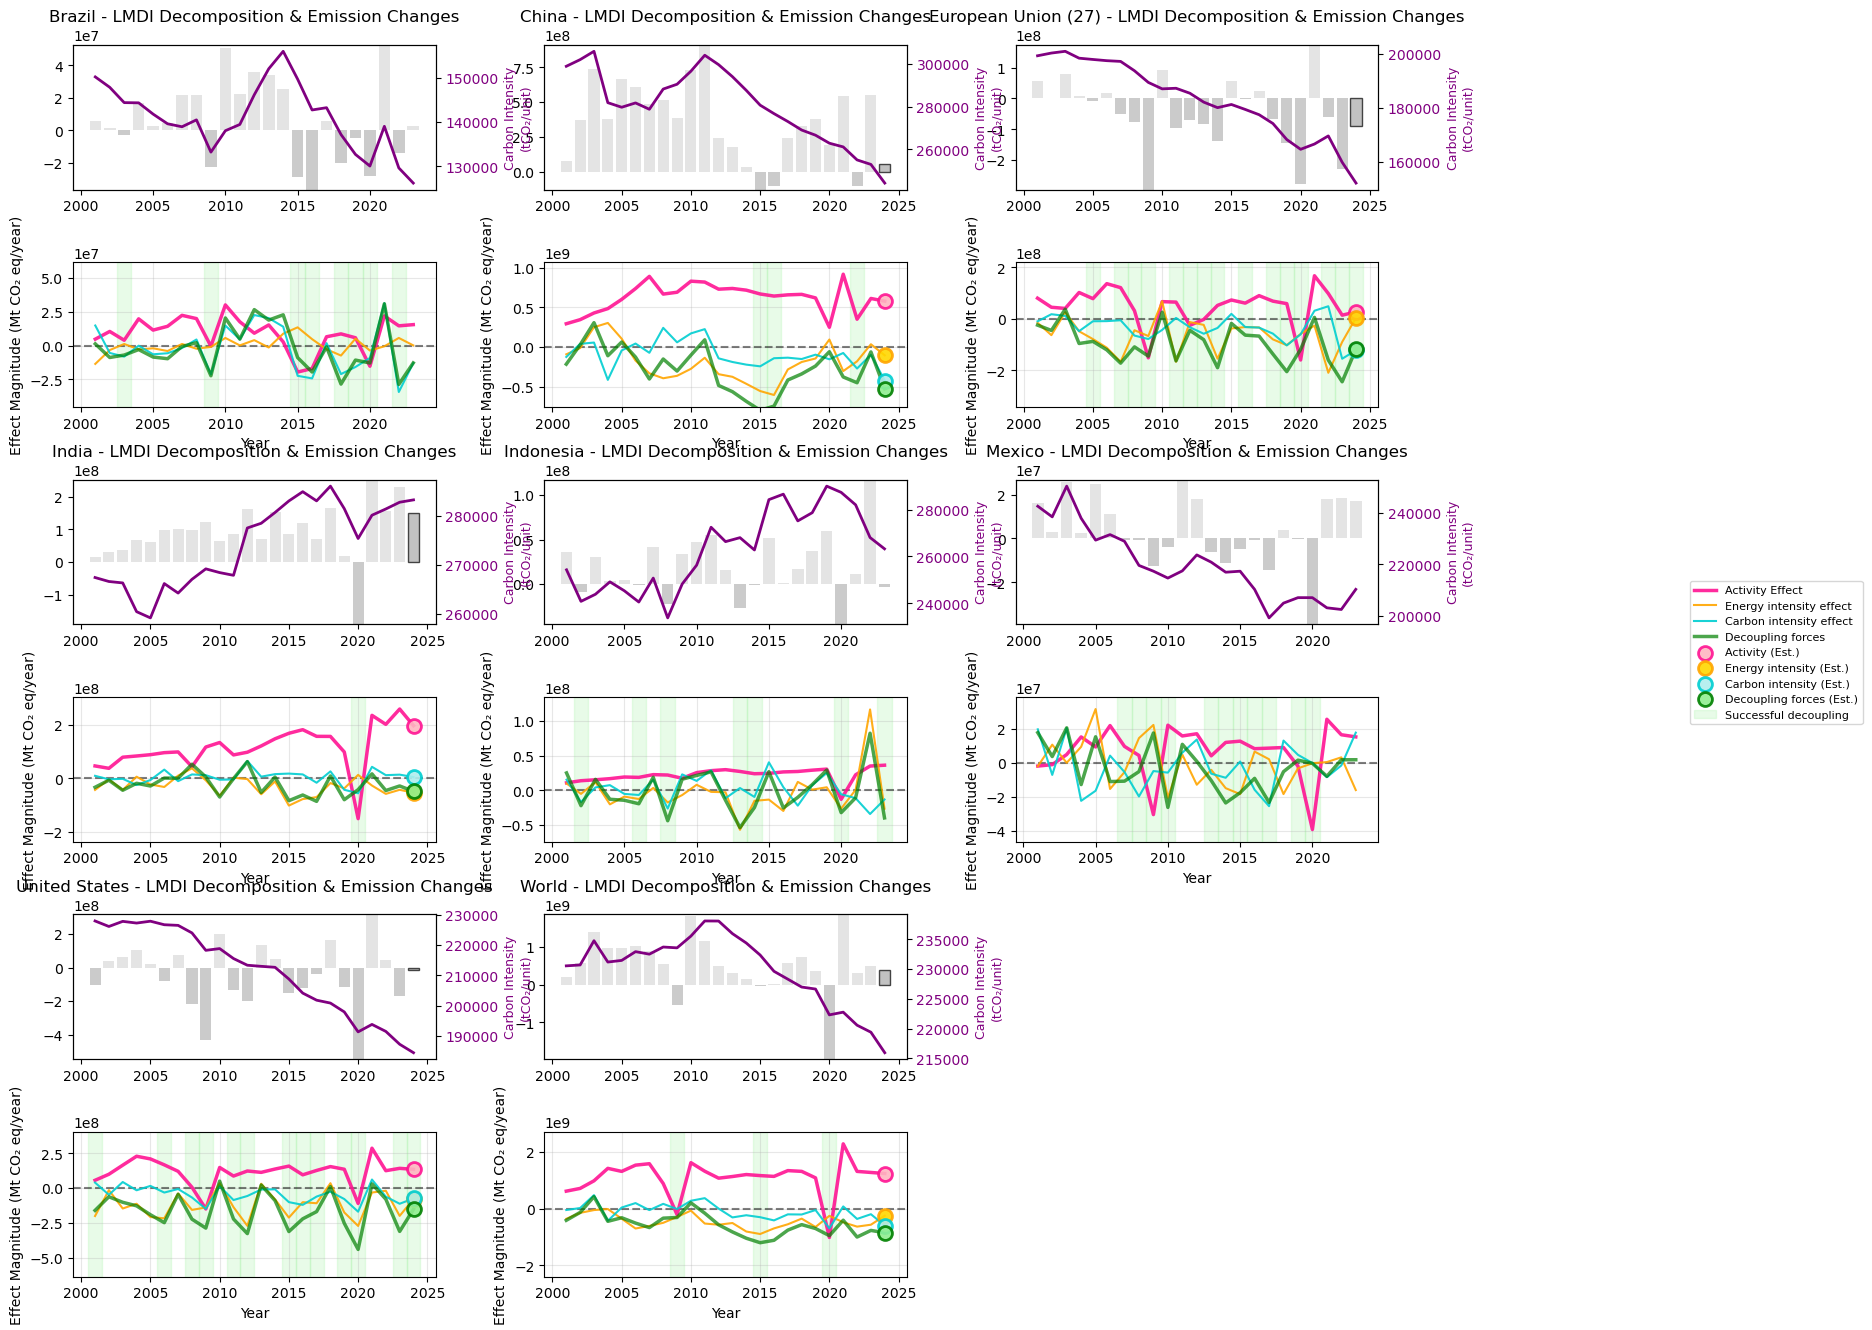

In [3]:
fig5 = analyzer.plot_lmdi_alldrivers_with_emission_changes()

In [5]:


# Initialize analyzer
analyzer = LMDIPeakAnalyzer()

# Load datasets one by one and inspect
print("=== Loading Individual Datasets ===")
data = analyzer.load_owid_data()
gdp_data = analyzer.load_gdp_data()
clean_data = analyzer.prepare_datasets()
merged_data = analyzer.merge_datasets()
merged_data2 = analyzer.add_2024_co2_estimates()
        
        # Continue with analysis
prepped = analyzer.prepare_lmdi_data()
analysed = analyzer.analyze_all_entities()
signals = analyzer.detect_structural_peaks()
# # Check what entities are available in each dataset
# print("\n=== Entity Coverage by Dataset ===")
# for name in ['GDP', 'CO2', 'Carbon Intensity','Primary Energy']:
#     entity_col = 'Entity' if 'Entity' in mergeddata.columns else 'Country'
#     entities = merged_data[entity_col].unique()
#     target_found = [e for e in ['China', 'United States', 'India', 'European Union (27)', 'World'] if e in entities]
#     print(f"{name}: {target_found}")



# # Inspect merged dataset
# print("\n=== Merged Dataset Summary ===")
# print(f"Shape: {merged_data.shape}")
# print(f"Columns: {list(merged_data.columns)}")
# print(f"Entities: {sorted(merged_data['country'].unique())}")

# # Check data coverage by entity
# print("\n=== Data Coverage by Entity ===")
# for entity in merged_data['country'].unique():
#     entity_data = merged_data[merged_data['country'] == entity]
#     print(f"\n{entity}:")
#     print(f"  Years: {entity_data['year'].min()}-{entity_data['year'].max()} ({len(entity_data)} rows)")
    
#     # Check which variables have data
#     variables = ['gdp', 'co2', 'primary_energy', 'carbon_intensity']
#     for var in variables:
#         if var in entity_data.columns:
#             non_null = entity_data[var].notna().sum()
#             print(f"  {var}: {non_null}/{len(entity_data)} years ({non_null/len(entity_data)*100:.1f}%)")

# # Show sample data
# print("\n=== Sample Merged Data ===")
# print(merged_data.head(10))

# # Check for any missing critical data
# print("\n=== Missing Data Check ===")
# required_vars = ['gdp', 'co2', 'primary_energy']
# for var in required_vars:
#     if var in merged_data.columns:
#         missing_by_entity = merged_data.groupby('country')[var].apply(lambda x: x.isna().sum())
#         print(f"{var} missing data:")
#         for entity, missing_count in missing_by_entity.items():
#             if missing_count > 0:
#                 total_rows = len(merged_data[merged_data['country'] == entity])
#                 print(f"  {entity}: {missing_count}/{total_rows} missing")

=== Loading Individual Datasets ===
Loading data from Our World in Data...
Loading co2 data...
  co2: 29137 rows, 4 columns
  Columns: ['Entity', 'Code', 'Year', 'emissions_total']
  Coverage: 8/8 target entities, years 1750-2023
  Total entities in dataset: 247
Loading primary_energy data...
  primary_energy: 13255 rows, 4 columns
  Columns: ['Entity', 'Code', 'Year', 'primary_energy_consumption__twh']
  Coverage: 8/8 target entities, years 1965-2024
  Total entities in dataset: 277
Successfully loaded 2/2 datasets
Loading GDP data from World Bank...
GDP data shape: (200, 3)
GDP columns: ['Entity', 'Year', 'GDP_PPP_2021']
Countries: ['Brazil', 'China', 'European Union (27)', 'India', 'Indonesia', 'Mexico', 'United States', 'World']
  Brazil: 25 years (2000-2024)
  China: 25 years (2000-2024)
  European Union (27): 25 years (2000-2024)
  Indonesia: 25 years (2000-2024)
  India: 25 years (2000-2024)
  Mexico: 25 years (2000-2024)
  United States: 25 years (2000-2024)
  World: 25 years (

In [26]:
analysed['World']

,year,activity_effect,intensity_effect,carbon_effect,total_change,computed_change,residual,activity_growth,energy_intensity_change,carbon_intensity_change,emissions_change,is_estimated
0,2001,6.114494e+08,-3.629020e+08,-5.280839e+07,1.957390e+08,1.957390e+08,-0.000067,0.024164,-0.014071,-0.002060,0.007673,False
1,2002,7.078972e+08,-1.541024e+08,1.678214e+07,5.705770e+08,5.705770e+08,0.000027,0.027611,-0.005912,0.000646,0.022196,False
2,2003,9.758754e+08,-5.528928e+07,4.720339e+08,1.392620e+09,1.392620e+09,-0.000042,0.036850,-0.002048,0.017658,0.052998,False
3,2004,1.414380e+09,-1.836079e+07,-4.330029e+08,9.630160e+08,9.630160e+08,0.000067,0.051531,-0.000652,-0.015265,0.034804,False
4,2005,1.307322e+09,-3.599876e+08,3.455485e+07,9.818890e+08,9.818890e+08,-0.000016,0.045916,-0.012286,0.001187,0.034293,False
5,2006,1.527769e+09,-7.046861e+08,1.909190e+08,1.014002e+09,1.014002e+09,0.000025,0.052034,-0.023125,0.006359,0.034240,False
6,2007,1.578137e+09,-6.153596e+08,-5.652984e+07,9.062480e+08,9.062480e+08,0.000004,0.052089,-0.019605,-0.001817,0.029588,False
7,2008,8.799071e+08,-5.042418e+08,1.638897e+08,5.395550e+08,5.395550e+08,-0.000034,0.028053,-0.015730,0.005166,0.017110,False
8,2009,-2.155184e+08,-2.976340e+08,-1.912557e+07,-5.322780e+08,-5.322780e+08,-0.000021,-0.006753,-0.009314,-0.000601,-0.016595,False
9,2010,1.614703e+09,-7.378670e+07,2.730645e+08,1.813981e+09,1.813981e+09,0.000015,0.051034,-0.002272,0.008453,0.057510,False


In [18]:
signals['China']['lmdi_trends']

,year,activity_effect,intensity_effect,carbon_effect,total_change,computed_change,residual,activity_growth,energy_intensity_change,carbon_intensity_change,emissions_change,is_estimated,activity_roll,decoupling_roll,decoupling_forces,decoupling_forces_roll,peak_signal_raw,peak_signal_smooth,decoupling_strength_raw,decoupling_strength_smooth
0,2001,2.945509e+08,-9.090663e+07,-1.243611e+08,79283200.0,7.928320e+07,3.442168e-06,0.083126,-0.024343,-0.033152,0.021726,False,NaN,NaN,2.152677e+08,NaN,False,False,0.730834,NaN
1,2002,3.459227e+08,-1.214807e+07,4.076207e+07,374536700.0,3.745367e+08,6.377697e-06,0.092434,-0.003100,0.010472,0.100452,False,3.202368e+08,-9.332686e+07,-2.861401e+07,9.332686e+07,False,False,-0.082718,0.291431
2,2003,4.300574e+08,2.506612e+08,5.735370e+07,738072300.0,7.380723e+08,-1.049042e-05,0.101182,0.057786,0.012937,0.179884,False,3.568437e+08,4.045373e+07,-3.080149e+08,-4.045373e+07,False,False,-0.716218,-0.113365
3,2004,4.851152e+08,3.044490e+08,-4.133319e+08,376232300.0,3.762323e+08,9.119511e-06,0.101314,0.062436,-0.078935,0.077716,False,4.203651e+08,7.591532e+07,1.088829e+08,-7.591532e+07,False,False,0.224448,-0.180594
4,2005,6.013129e+08,1.057113e+08,-4.226879e+07,664755400.0,6.647554e+08,-8.344650e-07,0.114582,0.019254,-0.007596,0.127412,False,5.054952e+08,8.752481e+07,-6.344249e+07,-8.752481e+07,False,False,-0.105507,-0.173147
5,2006,7.378652e+08,-1.703842e+08,4.474299e+07,612224000.0,6.122240e+08,-7.390976e-06,0.126747,-0.027180,0.007263,0.104082,False,6.080978e+08,-5.702722e+07,1.256412e+08,5.702722e+07,False,False,0.170277,0.093780
6,2007,8.914600e+08,-3.305994e+08,-7.164354e+07,489217000.0,4.892170e+08,4.827976e-06,0.141500,-0.047895,-0.010580,0.075330,False,7.435460e+08,-1.548139e+08,4.022430e+08,1.548139e+08,False,False,0.451218,0.208210
7,2008,6.682571e+08,-3.929677e+08,2.426605e+08,517949900.0,5.179499e+08,-3.993511e-06,0.096702,-0.052835,0.034087,0.074167,False,7.658608e+08,-2.260638e+08,1.503072e+08,2.260638e+08,False,False,0.224924,0.295176
8,2009,6.914821e+08,-3.619862e+08,6.008480e+07,389580700.0,3.895807e+08,-9.357929e-06,0.094027,-0.045955,0.007839,0.051934,False,7.503997e+08,-2.848172e+08,3.019014e+08,2.848172e+08,False,False,0.436600,0.379554
9,2010,8.309542e+08,-2.739921e+08,1.725359e+08,729498000.0,7.294980e+08,2.300739e-05,0.105963,-0.032664,0.021132,0.092446,False,7.302311e+08,-1.845549e+08,1.014562e+08,1.845549e+08,False,False,0.122096,0.252735


In [6]:
prepped[prepped['country']=='World']

,country,year,gdp,co2,primary_energy,is_estimated,activity,energy_intensity,carbon_intensity_final,emissions
172,World,2000,7.830523e+13,2.551055e+10,110416.40,False,7.830523e+13,1.410077e-09,231039.537605,2.551055e+10
173,World,2001,8.019742e+13,2.570629e+10,111493.29,False,8.019742e+13,1.390235e-09,230563.588176,2.570629e+10
174,World,2002,8.241176e+13,2.627687e+10,113894.43,False,8.241176e+13,1.382017e-09,230712.511578,2.627687e+10
175,World,2003,8.544865e+13,2.766949e+10,117849.60,False,8.544865e+13,1.379186e-09,234786.456636,2.766949e+10
176,World,2004,8.985193e+13,2.863251e+10,123841.74,False,8.985193e+13,1.378287e-09,231202.387822,2.863251e+10
177,World,2005,9.397759e+13,2.961440e+10,127936.72,False,9.397759e+13,1.361353e-09,231476.897329,2.961440e+10
178,World,2006,9.886760e+13,3.062840e+10,131481.20,False,9.886760e+13,1.329872e-09,232948.870257,3.062840e+10
179,World,2007,1.040175e+14,3.153464e+10,135617.98,False,1.040175e+14,1.303799e-09,232525.547129,3.153464e+10
180,World,2008,1.069355e+14,3.207420e+10,137229.40,False,1.069355e+14,1.283291e-09,233726.883598,3.207420e+10
181,World,2009,1.062134e+14,3.154192e+10,135033.22,False,1.062134e+14,1.271339e-09,233586.387113,3.154192e+10
